# Spike Mixture Train

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rnd

In [75]:
# define time scale
t = 10 #let's say seconds

# define firing rates (say per second) of latent variables (we will use these to initialise poisson processes)
v = [0.5,1,1.5]
lat = [] #an array of arrays for each of the latent variables

#realise poisson processes with given rates
for i in range(len(v)):
    lat.append([]) #create a new array for the latent variable
    #                          #1/rate = average time each spike takes
    ti = np.random.exponential(1/v[i]) #time of first spike    
    while ti < t: 
        lat[i].append(ti)
        ti += np.random.exponential(v[i]) #determine next spike by sampling from exponential distribution with given r


In [76]:
# w(i,j) is the probability of neuron i firing given that latent variable j fires
W = np.array([[0,0.2,1], #doesn't copy any of the 1st, some of the 2nd and all of the 3rd
              [0.5,0,0.5], #mixture of the 1st and 3rd latent trains
              [1,0,0.2]]) #copies all of the 1st and some of the 3rd

In [78]:
# transfer spikes from latent realisations to visible

vis = [] #an array of arrays with the spike times for each of the visible variables

for vi in range(len(W)): #create each visible spike train
    vis.append([])  
    for hi in range(len(W[vi])): #go through the hidden/latent spike trains
        #                          no. spikes.    prob. 
        n_vis = np.random.binomial(len(lat[hi]), W[vi,hi]) #determine how many spikes from the latent spike train we copy
        lat_rnd_copy = lat[hi].copy() #create a copy of the latent spike train
        rnd.shuffle(lat_rnd_copy) #shuffle it
        vis[vi] = vis[vi] + lat_rnd_copy[:n_vis] #take the first n_vis units from latent source hi

In [79]:
# write a function to take a list of times and fits them into discrete time bins
dt = 0.1            # width of time bins
n = math.ceil(t/dt)

def get_pos(time):
    return math.floor(time/dt) #rounds down so if spike happened in time [0.00, 0.01), it will be mapped to position 0

def fit_to_discr(spikes):
    discr = np.zeros(n,dtype=int)
    for spike_time in spikes:
        i = get_pos(spike_time)
        discr[i] = 1
    return discr


In [80]:
fit_to_discr(vis[1])

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [81]:
lat[2]

[0.434177653892355,
 3.1402398761580783,
 3.2701491853648066,
 5.348675202752315,
 5.890489275728556,
 6.002017043535501,
 6.072007918008821,
 7.09934272361086,
 7.91820847926224,
 9.627204515403642,
 9.882438808135268]

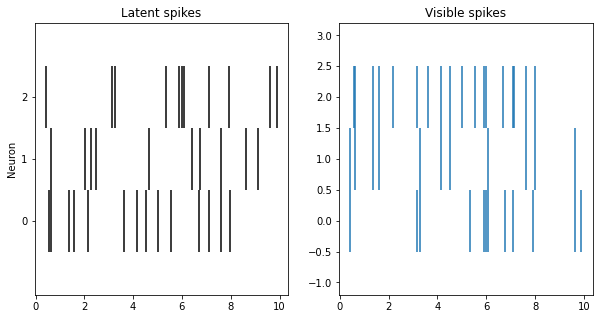

In [101]:
fig, (lat_ax, vis_ax) = plt.subplots(1, 2, figsize=(10,5))
lat_ax.eventplot(lat,colors="black")
lat_ax.set_title("Latent spikes")
lat_ax.set_yticks(np.arange(3))
lat_ax.set_ylabel("Neuron")

vis_ax.eventplot(vis)
vis_ax.set_title("Visible spikes")

fig.show()

In [5]:
help(np.random.binomial)

Help on built-in function binomial:

binomial(...) method of numpy.random.mtrand.RandomState instance
    binomial(n, p, size=None)
    
    Draw samples from a binomial distribution.
    
    Samples are drawn from a binomial distribution with specified
    parameters, n trials and p probability of success where
    n an integer >= 0 and p is in the interval [0,1]. (n may be
    input as a float, but it is truncated to an integer in use)
    
    .. note::
        New code should use the ``binomial`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    n : int or array_like of ints
        Parameter of the distribution, >= 0. Floats are also accepted,
        but they will be truncated to integers.
    p : float or array_like of floats
        Parameter of the distribution, >= 0 and <=1.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
  